In [15]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io
from scipy.optimize import minimize

import winsound
from datetime import datetime

In [3]:
data = scipy.io.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
#train set
Xtrain = pd.DataFrame(data['X'], columns=['x'])
ytrain = pd.DataFrame(data['y'])

#test set
Xtest = pd.DataFrame(data['Xtest'], columns=['x'])
ytest = pd.DataFrame(data['ytest'])

#cross-validation set
Xval = pd.DataFrame(data['Xval'], columns=['x'])
yval = pd.DataFrame(data['yval'])

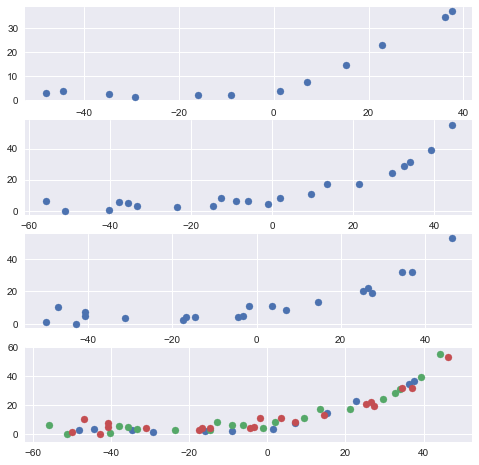

In [5]:
fig, axes = plt.subplots(nrows=4, figsize=[8,8])

axes[0].scatter(Xtrain, ytrain)
axes[1].scatter(Xtest, ytest)
axes[2].scatter(Xval, yval)

axes[3].scatter(Xtrain, ytrain)
axes[3].scatter(Xtest, ytest)
axes[3].scatter(Xval, yval)

In [8]:
def add_bias_unit(df, how='column'):
    """Add bias unit (column or row of 1s) to array at index 0"""
    if how == 'column':
        x_new = np.ones((df.shape[0], df.shape[1] + 1))
        x_new[:, 1:] = df
    elif how == 'row':
        x_new = np.ones((df.shape[0] + 1, df.shape[1]))
        x_new[1:, :] = df
    else:
        raise AttributeError('`how` must be `column` or `row`')
    return pd.DataFrame(x_new)

class Linear_reg(object):
    def __init__(self, X, y, lam):
        self.X = X
        self.x_ones = add_bias_unit(self.X)
        self.y = y
        self.lam = lam
        self.m = X.shape[0]
        
    def calculate_cost(self, theta, *therest):
        hypothesis = np.dot(self.x_ones, theta)
        cost = hypothesis - self.y
        cost = np.sum(np.power(cost,2)) / (2*self.m)
        reg = self.lam/(2*self.m) * np.sum(np.power(theta[1:],2))
        return cost + reg
    
    def perform_gradient_descent(self, theta, lam=0):
        gradient_history = []
        for ind, t in enumerate(theta):
            h = np.dot(self.x_ones, theta)
            err_vector = np.squeeze(h - self.y)
            b = self.x_ones.iloc[:, ind]
            a = np.dot(err_vector, b)
            gradient = np.sum(a) / self.m
            regularization = 0
            if ind is not 0:
                regularization = lam/self.m*theta[ind]
            gradient = gradient + regularization
            gradient_history.append(gradient)
        return np.array(gradient_history)

In [9]:
#--- Testing Part ---

EXPECTED_COST_WITHOUT_REG = 1.3533
EXPECTED_COST_WITH_REG = 1.6917

EXPECTED_NO_REG_GRAD = np.array([-1.4, -8.7333, -4.3333, -7.9333])
EXPECTED_REG_GRAD = np.array([-1.4, -8.26666667, -3.6333, -7.])

arr = [[8, 1, 6],[3, 5, 7],[4, 9, 2]]
testing_X = np.array(arr)
testing_y = [7, 6, 5]
testing_theta = [.1,.2,.3,.4]

#--- Test without regression ---
lam = 0

lr = Linear_reg(testing_X, testing_y, lam)
cst = lr.calculate_cost(testing_theta)
gr = lr.perform_gradient_descent(testing_theta, lam)

np.testing.assert_almost_equal(cst, EXPECTED_COST_WITHOUT_REG, decimal=4)
print('Are grad WITHOUT regression as expected?')
np.isclose(gr, EXPECTED_NO_REG_GRAD, rtol=4)
print('Test of cost WITHOUT regression passed')

#--- Test with regression ---
print()
lam = 7

lr = Linear_reg(testing_X, testing_y, lam)
cst = lr.calculate_cost(testing_theta)
gr = lr.perform_gradient_descent(testing_theta, lam)

np.testing.assert_almost_equal(cst, EXPECTED_COST_WITH_REG, decimal=4)
print('Are grad WITH regression as expected?')
np.isclose(gr, EXPECTED_REG_GRAD, rtol=4)
print('Test of cost WITH regression passed')

#--- Testing Part ---

Are grad WITHOUT regression as expected?


array([ True,  True,  True,  True], dtype=bool)

Test of cost WITHOUT regression passed

Are grad WITH regression as expected?


array([ True,  True,  True,  True], dtype=bool)

Test of cost WITH regression passed


In [10]:
#--- Example cost part ---
print()
COST_WITH_REG = 303.993
EXPECTED_REG_EXAMPLE_GRAD = np.array([-15.30, 598.250])

theta = np.array([1, 1]).reshape([-1,1])
lam = 1

lr = Linear_reg(Xtrain, ytrain, lam)
cst = lr.calculate_cost(theta)[0]
np.testing.assert_almost_equal(cst, COST_WITH_REG, decimal=3)
gr = lr.perform_gradient_descent(theta, lam)
print('Are grad WITH regression for example are as expected?')
np.isclose(gr, EXPECTED_REG_EXAMPLE_GRAD, rtol=3)
print('Test of cost WITH regression on example passed')

#--- Example cost part ---


Are grad WITH regression for example are as expected?


array([ True,  True], dtype=bool)

Test of cost WITH regression on example passed


In [11]:
def add_bias_unit(df, how='column'):
    """Add bias unit (column or row of 1s) to array at index 0"""
    if how == 'column':
        x_new = np.ones((df.shape[0], df.shape[1] + 1))
        x_new[:, 1:] = df
    elif how == 'row':
        x_new = np.ones((df.shape[0] + 1, df.shape[1]))
        x_new[1:, :] = df
    else:
        raise AttributeError('`how` must be `column` or `row`')
    return pd.DataFrame(x_new)

class Linear_reg(object):
    def __init__(self, X, y, lam):
        self.X = X
        self.x_ones = add_bias_unit(self.X)
        self.y = y
        self.lam = lam
        self.m = X.shape[0]
    def _reshape_theta(self, theta):
        try:
            theta.shape[1] == 1
        except IndexError:
            theta = theta.reshape([-1,1])
        return theta
        
    def calculate_cost(self, theta, *therest):
        theta = self._reshape_theta(theta)
        hypothesis = np.dot(self.x_ones, theta)
        cost = hypothesis - self.y
        cost = np.sum(np.power(cost,2)) / (2*self.m)
        reg = self.lam/(2*self.m) * np.sum(np.power(theta[1:],2))
        return (cost + reg)[0]
    
    def perform_gradient_descent(self, theta, lam=0):
        gradient_history = []
        for ind, t in enumerate(theta):
            theta = self._reshape_theta(theta)
            h = np.dot(self.x_ones, theta)
            err_vector = np.squeeze(h - self.y)
            b = self.x_ones.iloc[:, ind]
            a = np.dot(err_vector, b)
            gradient = np.sum(a) / self.m
            regularization = 0
            if ind is not 0:
                regularization = lam/self.m*theta[ind]
            gradient = gradient + regularization
            gradient_history.append(gradient)
        return np.array(gradient_history)

In [12]:
lam = 0
init_theta = np.array([0, 0]).reshape([-1,1])
lr = Linear_reg(Xtrain, ytrain, lam)

print(f'Starting calculations at: {str(datetime.now())}')
min_fun = opt.minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, args=(lam), options={'maxiter':50, 'disp':True})
print(f'Finished at: {str(datetime.now())}.')
print('Calculations ended.')
min_fun.x

Starting calculations at: 2017-07-14 17:17:19.562584
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Finished at: 2017-07-14 17:17:19.572600.
Calculations ended.


array([ 13.08790351,   0.36777923])

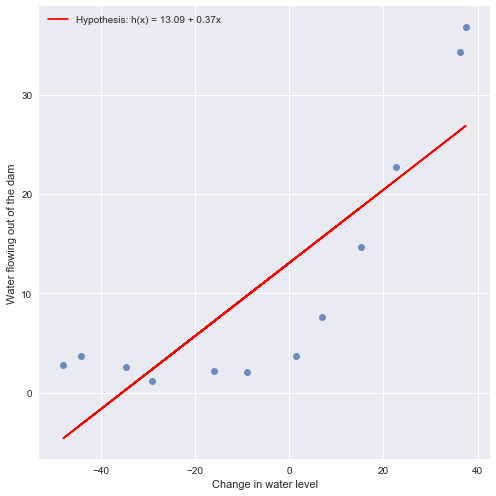

In [13]:
def calculate_hypothesis(X, theta):
    x_ones = add_bias_unit(X)
    return np.dot(x_ones, theta).reshape([-1,1])

def initialize_hypothesis_df(X, y, theta):
    df = X.copy()
    df['y'] = y
    df['pred'] = calculate_hypothesis(X, theta)
    return df

def plot_hypothesis(X, theta):
    sns.lmplot(data= X, x='x', y='y', size=7, fit_reg=False)
    label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1])
    plt.plot(X.x, X.pred, 'r-',label =label)
    plt.ylabel('Water flowing out of the dam')
    plt.xlabel('Change in water level');
    plt.legend()

theta = min_fun.x

hypothesis_df = initialize_hypothesis_df(Xtrain, ytrain, theta)
plot_hypothesis(hypothesis_df, theta)

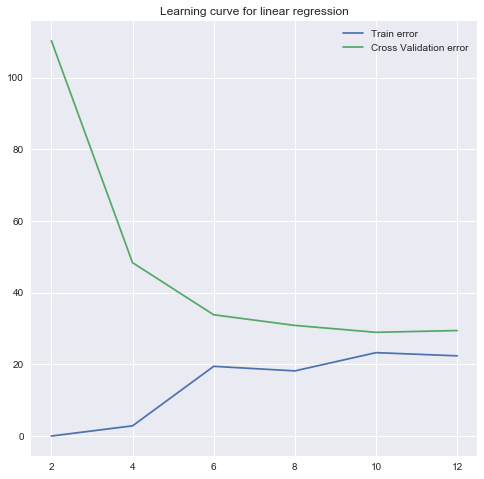

In [17]:
def calculate_error(X, y, theta):
    m = X.shape[0]
    h = calculate_hypothesis(X, theta)
    err = h - y
    return np.sum(np.power(err,2)) / (2*m)

def calculate_learning_curve(Xtrain, ytrain, split_size, Xval, yval):
    m = Xtrain.shape[0]
    init_theta = np.zeros(Xtrain.shape[1] + 1).reshape([-1,1])
    
    train_errors = []
    val_errors = []
    split_sizes= []
    for s in range(split_size, m+1, split_size):
        split_sizes.append(s)
        x = Xtrain[0:s]
        y = ytrain[0:s]
        
        lr = Linear_reg(x, y, lam)
        min_fun = minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, args=(lam), options={'maxiter':50, 'disp':False})

        theta = min_fun.x
        train_errors.append(calculate_error(x, y, theta))
        val_errors.append(calculate_error(Xval, yval, theta))
    return train_errors, val_errors, split_sizes

def plot_learning_curve(train_errors, val_errors, split_sizes):
    fig, axes = plt.subplots(figsize=[8,8])
    plt.plot(split_sizes, train_errors)
    plt.plot(split_sizes, val_errors)
    plt.title('Learning curve for linear regression')
    axes.legend(['Train error', 'Cross Validation error'])
    

lam = 0
init_theta = np.array([0, 0]).reshape([-1,1])
split_size = 2

train_errors, val_errors, split_sizes = calculate_learning_curve(Xtrain, ytrain, split_size,  Xval, yval)
plot_learning_curve(train_errors, val_errors, split_sizes)

In [18]:
def get_polynomials(x, poly):
    df = pd.DataFrame()
    for p in range(1, poly+1):
        col = 'x' + str(p)
        df[col] = np.power(x, p)
    return df

get_polynomials([1,2,3], 3)

,x1,x2,x3
0,1,1,1
1,2,4,8
2,3,9,27


Using Standard scaler (val-mean)/std

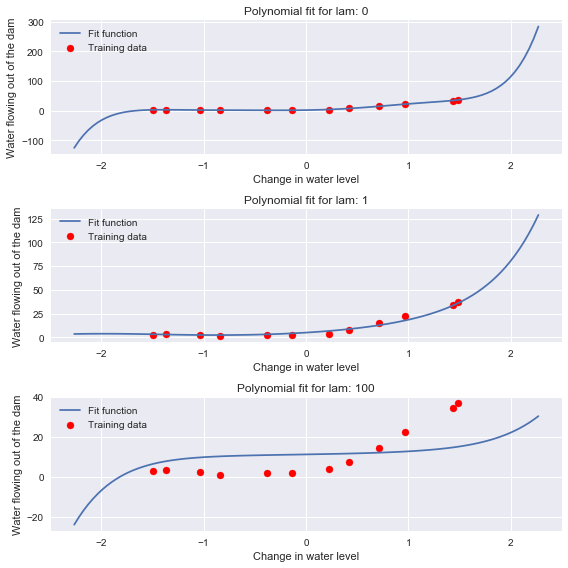

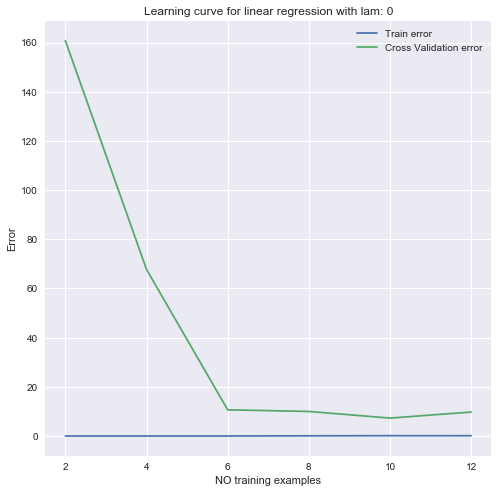

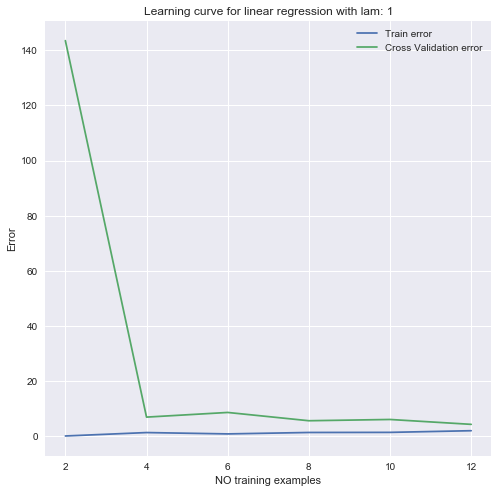

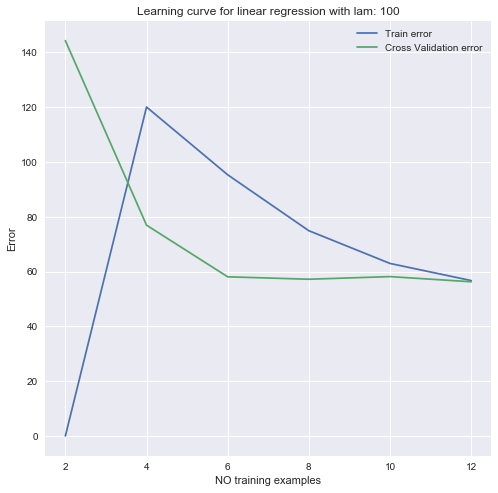

In [23]:
from sklearn.preprocessing import StandardScaler

def get_polynomials(x, poly):
    df = pd.DataFrame()
    for p in range(1, poly+1):
        col = 'x' + str(p)
        df[col] = np.power(x, p)
    return df

def calculate_hypothesis(X, theta):
    x_ones = add_bias_unit(X)
    return np.dot(x_ones, theta).reshape([-1,1])

def calculate_error(X, y, theta):
    m = X.shape[0]
    h = calculate_hypothesis(X, theta)
    err = h - y
    return np.sum(np.power(err,2)) / (2*m)

def calculate_learning_curve(Xtrain, ytrain, split_size, Xval, yval, lam):
    m = Xtrain.shape[0]
    init_theta = np.zeros(Xtrain.shape[1] + 1).reshape([-1,1])
    
    train_errors = []
    val_errors = []
    split_sizes= []
    for s in range(split_size, m+1, split_size):
        split_sizes.append(s)
        x = Xtrain[0:s]
        y = ytrain[0:s]
        
        lr = Linear_reg(x, y, lam)
        min_fun = opt.minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, args=(lam), options={'maxiter':50, 'disp':False})

        theta = min_fun.x
        train_errors.append(calculate_error(x, y, theta))
        val_errors.append(calculate_error(Xval, yval, theta))
    return train_errors, val_errors, split_sizes    

class polynomial_regression(object):

    def __init__(self, Xtrain, ytrain, Xval, yval, scaler, polynomial):
        self.scaler = scaler
        self.polynomial = polynomial
        self.ytrain = ytrain
        self.yval = yval
        self.Xtrain = pd.DataFrame(sdsc.fit_transform(get_polynomials(Xtrain, polynomial)))
        self.Xval = pd.DataFrame(sdsc.transform(get_polynomials(Xval, polynomial)))
        
    def minimize(self, lam):
        init_theta = np.zeros(self.Xtrain.shape[1] + 1).reshape([-1,1])
        lr = Linear_reg(self.Xtrain, self.ytrain, lam)
        min_fun = opt.minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, args=(lam), options={'maxiter':50, 'disp':False})
        self.min_fun = min_fun
        self.theta = min_fun.x
        return self.theta
    
    def plot_learning_curve(self, train_errors, val_errors, split_sizes, lam):
        fig, axes = plt.subplots(figsize=[8,8])
        
        plt.plot(split_sizes, train_errors)
        plt.plot(split_sizes, val_errors)
        
        title = 'Learning curve for linear regression with lam: ' + str(lam)
        plt.title(title)
        plt.ylabel('Error')
        plt.xlabel('NO training examples')
        axes.legend(['Train error', 'Cross Validation error'])
        
    def draw_polynomial_learning_curve(self, split_size, lam):
        train_errors, val_errors, split_sizes = calculate_learning_curve(self.Xtrain, self.ytrain, split_size,  self.Xval, self.yval, lam)
        self.plot_learning_curve(train_errors, val_errors, split_sizes, lam)
    
    def plot_polynomial_fit(self, fun_x, fun_y, lam, ax):
        ax.scatter(x=self.Xtrain[0], y=self.ytrain, c='r')
        ax.plot(fun_x, fun_y)
        
        title = 'Polynomial fit for lam: ' + str(lam)
        ax.set_title(title)
        ax.legend(['Fit function', 'Training data'])
        ax.set_xlabel('Change in water level')
        ax.set_ylabel('Water flowing out of the dam')
    
    def calculate_function_points(self, fun_range, precision):
        x =np.linspace(fun_range[0], fun_range[1], precision)
        x= get_polynomials(x, self.polynomial)
        fun_x = pd.DataFrame(self.scaler.transform(x))
        fun_y = calculate_hypothesis(fun_x, self.theta)
        return fun_x, fun_y
    
    def draw_polynomial_fit(self, fun_range, precision, ax, lam):
        self.minimize(lam)
        fun_x, fun_y = self.calculate_function_points(fun_range, precision)
        self.plot_polynomial_fit(fun_x[0], fun_y, lam, ax)
        
    
def draw_polynomial_fit_and_Learning_curve_for_lambdas(lambdas, fun_range, precision, poly_regression, split_size):
    fig, axes = plt.subplots(nrows=len(lambdas), figsize=[8,8])

    for ind, lam in enumerate(lambdas):
        poly_regression.draw_polynomial_learning_curve(split_size, lam)
        ax = axes[ind]
        poly_regression.draw_polynomial_fit(fun_range, precision, ax, lam)
    fig.tight_layout()        
        
sdsc = StandardScaler()
polynomial = 8

pr = polynomial_regression(Xtrain, ytrain, Xval, yval, sdsc, polynomial)

fun_range = [-70, 60]
precision = 100
lambdas = [0, 1, 100]
split_size = 2

draw_polynomial_fit_and_Learning_curve_for_lambdas(lambdas, fun_range, precision, pr, split_size)